# Clase 16

## 1 Clustering Jerárquico y DBSCAN

### 1.1 Organizar los clusters como un Árbol Jerárquico

Una ventaja de este tipo de algoritmos es que no es necesario especificar el número de clusters a priori.

Los dos enfoques principales del clustering jerárquico son el **aglomerativo** y el **jerárquico divisivo**.

En el **clustering jerárquico divisivo**, comenzamos con un clúster que abarca todas las muestras, y dividimos iterativamente en clusters más pequeños hasta que cada uno de estos contenga solo una muestra.

La **agrupación aglomerativa** adopta el enfoque opuesto al enfoque divisivo. Comenzamos con cada muestra como un clúster individual y fusionamos los pares de clusters más cercanos hasta que sólo queda un clúster.

#### 1.1.1 Agrupación Jarárquica Aglomerativa

Los dos algoritmos estándar para la agrupación jerárquica aglomerativa son la **vinculación simple** y la **vinculación completa**.

En el caso de la **vinculación simple**, se calculan las distancias entre los miembros más similares de cada par de conglomerados y se fusionan los dos conglomerados cuya distancia entre los miembros más similares sea la menor.

El enfoque de **vinculación completa** es similar al de vinculación simple, pero en lugar de comparar los miembros más similares de cada par de conglomerados, comparamos los miembros más disímiles para realizar la fusión.

Otros algoritmos comúnmente utilizados para la agrupación jerárquica aglomerativa son la **vinculación promedio** y la **vinculación de Ward**.

En la vinculación promedio, se fusionan los pares de conglomerados basándose en las distancias medias mínimas entre todos los miembros del grupo en los dos conglomerados. En la vinculación de Ward, se fusionan los dos clusters que conducen al mínimo incremento de la SSE total dentro del cluster.

#### 1.1.2 Algoritmo para clustering jerárquico con vinculación completa

1. Calcular la matriz de distancias de todas las muestras.
2. Representar cada punto de datos como un clúster único.
3. Combinar los dos clusters más cercanos en función de la distancia entre los miembros más disímiles (distantes).
4. Actualizar la matriz de similitud.
5. Repetir los pasos 2-4 hasta que quede un único cluster.

In [1]:
import pandas as pd
import numpy as np

np.random.seed(123)
variables = ['X', 'Y', 'Z']
labels = ['ID_0', 'ID_1', 'ID_2', 'ID_3', 'ID_4']
X = np.random.random_sample([5, 3])*10
df = pd.DataFrame(X, columns=variables, index=labels)
df

,X,Y,Z
ID_0,6.964692,2.861393,2.268515
ID_1,5.513148,7.194690,4.231065
ID_2,9.807642,6.848297,4.809319
ID_3,3.921175,3.431780,7.290497
ID_4,4.385722,0.596779,3.980443


### Paso1

In [2]:
from scipy.spatial.distance import pdist, squareform

row_dist = pd.DataFrame(squareform(pdist(df, metric='euclidean')),columns=labels, index=labels)
row_dist

,ID_0,ID_1,ID_2,ID_3,ID_4
ID_0,0.000000,4.973534,5.516653,5.899885,3.835396
ID_1,4.973534,0.000000,4.347073,5.104311,6.698233
ID_2,5.516653,4.347073,0.000000,7.244262,8.316594
ID_3,5.899885,5.104311,7.244262,0.000000,4.382864
ID_4,3.835396,6.698233,8.316594,4.382864,0.000000


In [3]:
from scipy.cluster.hierarchy import linkage

row_clusters = linkage(row_dist, method='complete', metric='euclidean')
pd.DataFrame(row_clusters,
columns=['row label 1', 'row label 2','distance', 'no. of items in clust.'],
index=['cluster %d' % (i + 1) for i in range(row_clusters.shape[0])])

C:\Users\Javiera Carrasco\AppData\Local\Temp\ipykernel_4444\241504469.py:3: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  row_clusters = linkage(row_dist, method='complete', metric='euclidean')


,row label 1,row label 2,distance,no. of items in clust.
cluster 1,0.0,4.0,6.521973,2.0
cluster 2,1.0,2.0,6.729603,2.0
cluster 3,3.0,5.0,8.539247,3.0
cluster 4,6.0,7.0,12.444824,5.0


In [4]:
help(linkage)

Help on function linkage in module scipy.cluster.hierarchy:

linkage(y, method='single', metric='euclidean', optimal_ordering=False)
    Perform hierarchical/agglomerative clustering.
    
    The input y may be either a 1-D condensed distance matrix
    or a 2-D array of observation vectors.
    
    If y is a 1-D condensed distance matrix,
    then y must be a :math:`\binom{n}{2}` sized
    vector, where n is the number of original observations paired
    in the distance matrix. The behavior of this function is very
    similar to the MATLAB linkage function.
    
    A :math:`(n-1)` by 4 matrix ``Z`` is returned. At the
    :math:`i`-th iteration, clusters with indices ``Z[i, 0]`` and
    ``Z[i, 1]`` are combined to form cluster :math:`n + i`. A
    cluster with an index less than :math:`n` corresponds to one of
    the :math:`n` original observations. The distance between
    clusters ``Z[i, 0]`` and ``Z[i, 1]`` is given by ``Z[i, 2]``. The
    fourth value ``Z[i, 3]`` represents t

In [5]:
row_clusters = linkage(pdist(df, metric='euclidean'), method='complete')
pd.DataFrame(row_clusters,
columns=['row label 1', 'row label 2',
'distance', 'no. of items in clust.'],
index=['cluster %d' % (i + 1) for i in range(row_clusters.shape[0])])

,row label 1,row label 2,distance,no. of items in clust.
cluster 1,0.0,4.0,3.835396,2.0
cluster 2,1.0,2.0,4.347073,2.0
cluster 3,3.0,5.0,5.899885,3.0
cluster 4,6.0,7.0,8.316594,5.0


In [6]:
row_clusters = linkage(df.values, method='complete', metric='euclidean')
pd.DataFrame(row_clusters,
columns=['row label 1', 'row label 2',
'distance', 'no. of items in clust.'],
index=['cluster %d' % (i + 1) for i in range(row_clusters.shape[0])])

,row label 1,row label 2,distance,no. of items in clust.
cluster 1,0.0,4.0,3.835396,2.0
cluster 2,1.0,2.0,4.347073,2.0
cluster 3,3.0,5.0,5.899885,3.0
cluster 4,6.0,7.0,8.316594,5.0


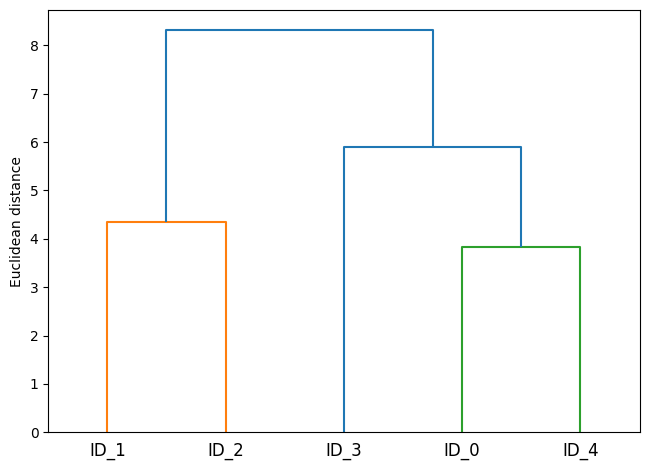

In [7]:
from scipy.cluster.hierarchy import dendrogram
import matplotlib.pyplot as plt
row_dendr = dendrogram(row_clusters,
labels=labels,
# make dendrogram black (part 2/2)
# color_threshold=np.inf
)
plt.tight_layout()
plt.ylabel('Euclidean distance')
#plt.savefig('images/11_11.png', dpi=300,
# bbox_inches='tight')
plt.show()

### Dendrograma y mapa de calor

C:\Users\acer\AppData\Local\Temp\ipykernel_3644\1244487166.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  axm.set_xticklabels([''] + list(df_rowclust.columns))
C:\Users\acer\AppData\Local\Temp\ipykernel_3644\1244487166.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  axm.set_yticklabels([''] + list(df_rowclust.index))


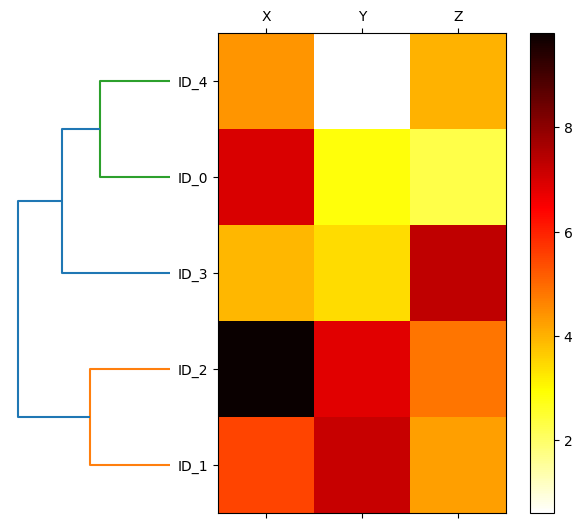

In [8]:
# plot row dendrogram
fig = plt.figure(figsize=(8, 8), facecolor='white')
axd = fig.add_axes([0.09, 0.1, 0.2, 0.6])
# note: for matplotlib < v1.5.1, please use orientation='right'
row_dendr = dendrogram(row_clusters, orientation='left')
# reorder data with respect to clustering
df_rowclust = df.iloc[row_dendr['leaves'][::-1]]
axd.set_xticks([])
axd.set_yticks([])
# remove axes spines from dendrogram
for i in axd.spines.values():
    i.set_visible(False)
# plot heatmap
axm = fig.add_axes([0.23, 0.1, 0.6, 0.6]) # x-pos, y-pos, width, height
cax = axm.matshow(df_rowclust, interpolation='nearest', cmap='hot_r')
fig.colorbar(cax)
axm.set_xticklabels([''] + list(df_rowclust.columns))
axm.set_yticklabels([''] + list(df_rowclust.index))
#plt.savefig('images/11_12.png', dpi=300)
plt.show()


### Ahora con  Sklearn

In [9]:
from sklearn.cluster import AgglomerativeClustering
ac =AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='complete')
labels = ac.fit_predict(X)
print('Cluster labels: %s' % labels)

Cluster labels: [1 0 0 2 1]


Cluster labels: [0 0 0 0 0]
Cluster labels: [0 1 1 0 0]
Cluster labels: [1 0 0 2 1]
Cluster labels: [0 3 1 2 0]


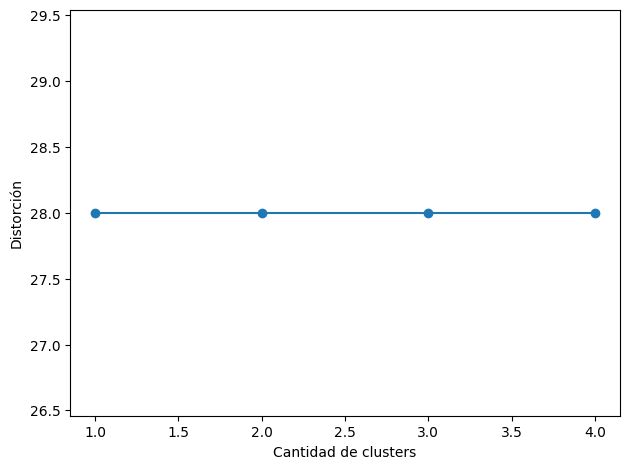

[28, 28, 28, 28]

In [20]:
from turtle import distance


distances = []
for i in range(1,len(X)):
    ac = AgglomerativeClustering(n_clusters=i,affinity='euclidean',linkage='complete', compute_distances = True)
    labels = ac.fit_predict(X)
    print('Cluster labels: %s' % labels)
    distances.append(ac.children_.sum())
plt.plot(range(1, len(X)), distances, marker='o')
plt.xlabel('Cantidad de clusters')
plt.ylabel('Distorción')
plt.tight_layout()
#plt.savefig('images/11_03.png', dpi=300)
plt.show()
distances

## Density-Based Spatial Clistering of Applications with Noise (DBSCAN)

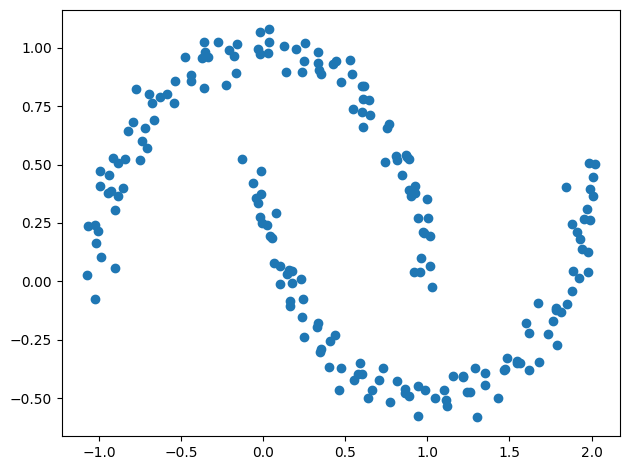

In [21]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)
plt.scatter(X[:, 0], X[:, 1])
plt.tight_layout()
#plt.savefig('images/11_14.png', dpi=300)
plt.show()

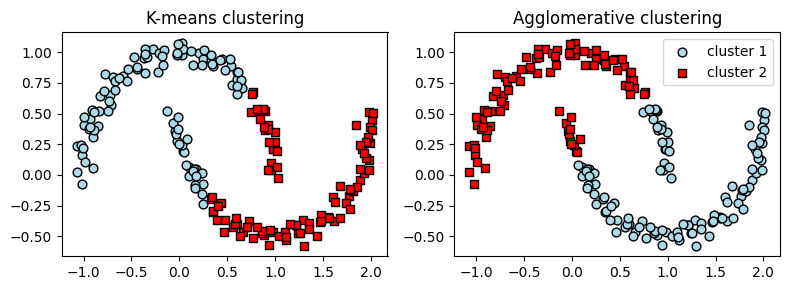

In [22]:
from sklearn.cluster import KMeans
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 3))
km = KMeans(n_clusters=2, random_state=0)
y_km = km.fit_predict(X)
ax1.scatter(X[y_km == 0, 0], X[y_km == 0, 1],
edgecolor='black',
c='lightblue', marker='o', s=40, label='cluster 1')
ax1.scatter(X[y_km == 1, 0], X[y_km == 1, 1],
edgecolor='black',
c='red', marker='s', s=40, label='cluster 2')
ax1.set_title('K-means clustering')
ac = AgglomerativeClustering(n_clusters=2,affinity='euclidean',linkage='complete')
y_ac = ac.fit_predict(X)
ax2.scatter(X[y_ac == 0, 0], X[y_ac == 0, 1], c='lightblue',
edgecolor='black',
marker='o', s=40, label='cluster 1')
ax2.scatter(X[y_ac == 1, 0], X[y_ac == 1, 1], c='red',
edgecolor='black',
marker='s', s=40, label='cluster 2')
ax2.set_title('Agglomerative clustering')
plt.legend()
plt.tight_layout()
# plt.savefig('images/11_15.png', dpi=300)
plt.show()

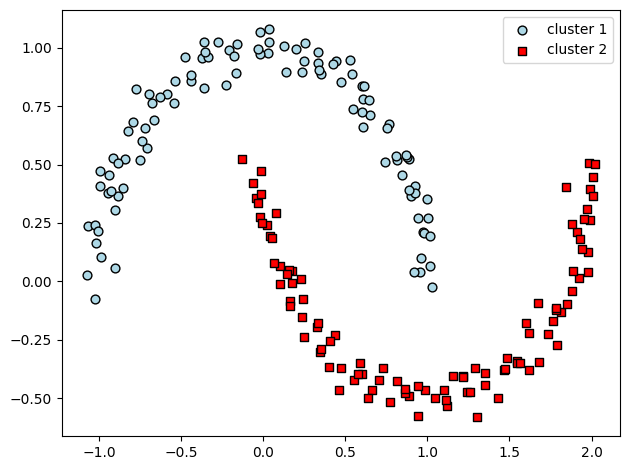

In [33]:
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=0.2, min_samples=2, metric='l1')
y_db = db.fit_predict(X)
plt.scatter(X[y_db == 0, 0], X[y_db == 0, 1],
c='lightblue', marker='o', s=40,
edgecolor='black',
label='cluster 1')
plt.scatter(X[y_db == 1, 0], X[y_db == 1, 1],
c='red', marker='s', s=40,
edgecolor='black',
label='cluster 2')
plt.legend()
plt.tight_layout()
#plt.savefig('images/11_16.png', dpi=300)
plt.show()

### Actividad final

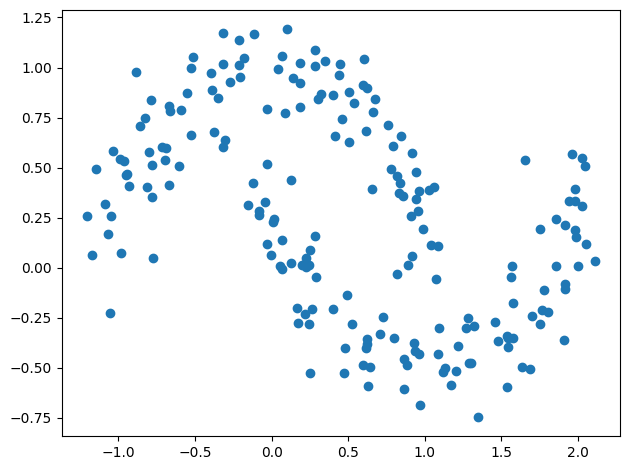

In [32]:
X1, y1 = make_moons(n_samples=200, noise=0.12, random_state=0)
plt.scatter(X1[:, 0], X1[:, 1])
plt.tight_layout()
#plt.savefig('images/11_14.png', dpi=300)
plt.show()

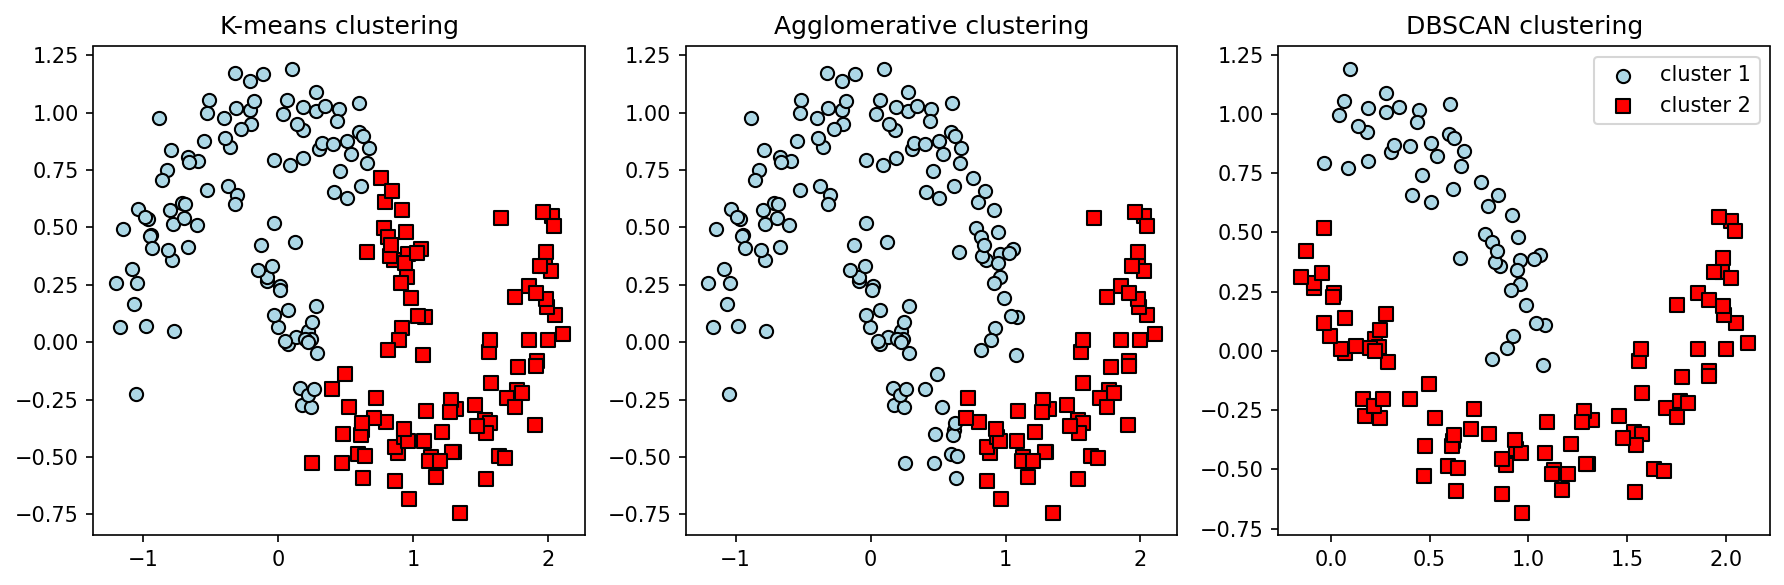

In [40]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 4), dpi =150)
km = KMeans(n_clusters=2, random_state=0)
y_km = km.fit_predict(X1)
ax1.scatter(X1[y_km == 0, 0], X1[y_km == 0, 1],
edgecolor='black',
c='lightblue', marker='o', s=40, label='cluster 1')
ax1.scatter(X1[y_km == 1, 0], X1[y_km == 1, 1],
edgecolor='black',
c='red', marker='s', s=40, label='cluster 2')
ax1.set_title('K-means clustering')
ac = AgglomerativeClustering(n_clusters=2,affinity='euclidean',linkage='complete')
y_ac = ac.fit_predict(X1)
ax2.scatter(X1[y_ac == 0, 0], X1[y_ac == 0, 1], c='lightblue',
edgecolor='black',
marker='o', s=40, label='cluster 1')
ax2.scatter(X1[y_ac == 1, 0], X1[y_ac == 1, 1], c='red',
edgecolor='black',
marker='s', s=40, label='cluster 2')
ax2.set_title('Agglomerative clustering')

db = DBSCAN(eps=0.2, min_samples=2, metric='l1')
y_db = db.fit_predict(X1)
ax3.scatter(X1[y_db == 0, 0], X1[y_db == 0, 1], c='lightblue',
edgecolor='black',
marker='o', s=40, label='cluster 1')
ax3.scatter(X1[y_db == 1, 0], X1[y_db == 1, 1], c='red',
edgecolor='black',
marker='s', s=40, label='cluster 2')
ax3.set_title('DBSCAN clustering')

plt.legend()
plt.tight_layout()
# plt.savefig('images/11_15.png', dpi=300)
plt.show()